In [16]:
import tensorflow as tf # pip install tensorflow

In [20]:
from keras.datasets import mnist

In [22]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

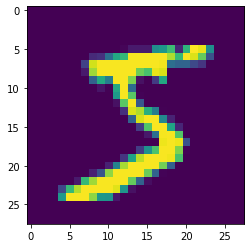

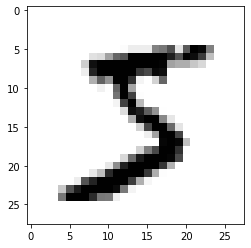

In [36]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap = plt.cm.binary)

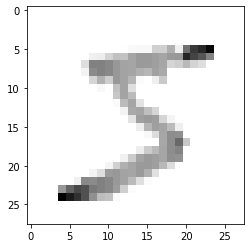

In [38]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [40]:
import numpy as np
IMG_size = 28
x_train = np.array(x_train).reshape(-1,IMG_size,IMG_size,1)
x_test = np.array(x_test).reshape(-1,IMG_size,IMG_size,1)
print("training samplem dimension", x_train.shape)
print("test samplem dimension", x_test.shape)

training samplem dimension (60000, 28, 28, 1)
test samplem dimension (10000, 28, 28, 1)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [63]:
model = Sequential()

# First convolution layer 28-3+1=26
model.add(Conv2D(64,(3,3),input_shape = x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# 2nd convolution layer 26-3+1=24
model.add(Conv2D(64,(3,3),input_shape = x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# 3rd convolution layer 24*24
model.add(Conv2D(64,(3,3),input_shape = x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# Fully connected layer #1 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Fully connected layer #2
model.add(Dense(32))
model.add(Activation("relu"))

# Last Fully connected layer, output must be equal to number of classes, 10(0-9 characters)
model.add(Dense(10)) #this last dense later must be 10
model.add(Activation("softmax")) #give you class probobabilities (softmax)



In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_7 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_8 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [50]:
print("Total Training Samples = ",len(x_train))

Total Training Samples =  60000


In [55]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [56]:
model.fit(x_train,y_train,epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 49s 37ms/step - loss: 0.3171 - accuracy: 0.8990 - val_loss: 0.1214 - val_accuracy: 0.9634
Epoch 2/5
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0993 - accuracy: 0.9690 - val_loss: 0.0996 - val_accuracy: 0.9697
Epoch 3/5
1313/1313 [==============================] - 48s 36ms/step - loss: 0.0717 - accuracy: 0.9783 - val_loss: 0.0679 - val_accuracy: 0.9796
Epoch 4/5
1313/1313 [==============================] - 50s 38ms/step - loss: 0.0555 - accuracy: 0.9824 - val_loss: 0.0783 - val_accuracy: 0.9782
Epoch 5/5
1313/1313 [==============================] - 51s 39ms/step - loss: 0.0451 - accuracy: 0.9855 - val_loss: 0.0570 - val_accuracy: 0.9831


In [59]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Test Loss on 10000 test samples",test_loss)
print("Validation Accuracy on 10000 test samples",test_acc)

313/313 [==============================] - 2s 8ms/step - loss: 0.0597 - accuracy: 0.9823
Test Loss on 10000 test samples 0.05972982197999954
Validation Accuracy on 10000 test samples 0.9822999835014343


In [60]:
predictions = model.predict([x_test])

In [61]:
print(predictions)

[[3.66593061e-10 1.83601671e-07 1.01018732e-05 ... 9.99988317e-01
  5.46143131e-09 3.62626693e-08]
 [3.95746014e-08 1.15404806e-08 9.99999881e-01 ... 6.16385520e-08
  5.18240384e-08 1.12645372e-10]
 [2.36032305e-09 9.99992609e-01 1.42893293e-06 ... 9.73160468e-07
  5.99995502e-08 2.78887047e-08]
 ...
 [1.91609861e-09 6.66574618e-09 1.31437021e-08 ... 1.60082763e-07
  1.27839371e-07 2.01222774e-05]
 [1.75590212e-05 1.27781735e-11 5.41291623e-10 ... 6.53290755e-11
  1.01851691e-02 2.15875775e-06]
 [8.49748030e-05 1.79980276e-07 2.91340393e-06 ... 1.32382112e-07
  8.02136899e-04 3.68813858e-06]]
